In [2]:
import numpy as np 
import pandas as pd

In [15]:
missing_values = ['n/a','na','--']

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)


In [17]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [11]:
print(df['PID'].isnull())
print(df['ST_NUM'].isnull())
print(df['ST_NAME'].isnull())


0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: ST_NAME, dtype: bool


In [13]:
print(df['OWN_OCCUPIED'].isnull())
print(df['NUM_BEDROOMS'].isnull())
print(df['NUM_BATH'].isnull())
print(df['SQ_FT'].isnull())

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool
0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: NUM_BATH, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
Name: SQ_FT, dtype: bool


In [23]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [24]:
cnt=0

for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt +=1

In [26]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [28]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [32]:
df.loc[2,'ST_NUM']=125
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [34]:
median = df['NUM_BEDROOMS'].median() 
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [40]:
%matplotlib inline
data=pd.ExcelFile("obes.xls")
data

In [42]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [44]:
data_age = data.parse(u'7.2', skiprows=4,skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [56]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0


In [64]:
data_age.dropna(inplace=True)

In [65]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot: xlabel='Year'>

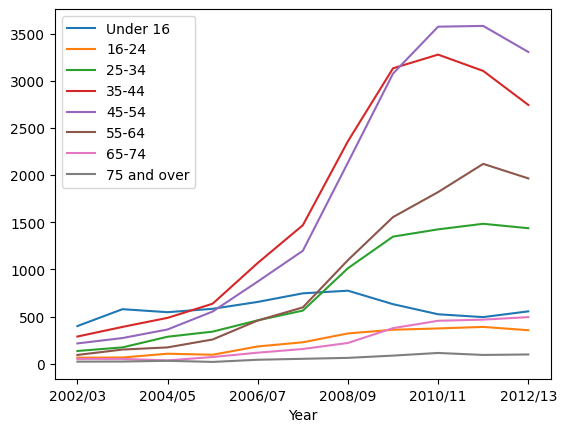

In [67]:
data_age_minus_total.plot()

<AxesSubplot: xlabel='Year'>

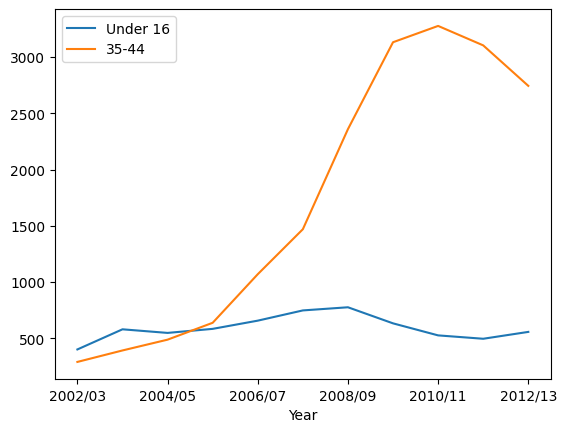

In [70]:
data_age['Under 16'].plot(label="Under 16", legend=True) 
data_age['35-44'].plot(label="35-44", legend=True)

In [72]:
from datetime import datetime

In [78]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [81]:
df = pd.DataFrame(date_rng, columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [85]:
df['datetime']=pd.to_datetime(df['date'])
df =df.set_index('datetime')
df

,date
datetime,
2020-01-01 00:00:00,2020-01-01 00:00:00
2020-01-01 01:00:00,2020-01-01 01:00:00
2020-01-01 02:00:00,2020-01-01 02:00:00
2020-01-01 03:00:00,2020-01-01 03:00:00
2020-01-01 04:00:00,2020-01-01 04:00:00
...,...
2020-01-07 20:00:00,2020-01-07 20:00:00
2020-01-07 21:00:00,2020-01-07 21:00:00
2020-01-07 22:00:00,2020-01-07 22:00:00


In [87]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [89]:
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,32
2020-01-01 01:00:00,2020-01-01 01:00:00,9
2020-01-01 02:00:00,2020-01-01 02:00:00,17
2020-01-01 03:00:00,2020-01-01 03:00:00,57
2020-01-01 04:00:00,2020-01-01 04:00:00,68
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,7
2020-01-07 21:00:00,2020-01-07 21:00:00,73
2020-01-07 22:00:00,2020-01-07 22:00:00,30


In [91]:
df.drop(['date'], axis=1)

,data
datetime,
2020-01-01 00:00:00,32
2020-01-01 01:00:00,9
2020-01-01 02:00:00,17
2020-01-01 03:00:00,57
2020-01-01 04:00:00,68
...,...
2020-01-07 20:00:00,7
2020-01-07 21:00:00,73
2020-01-07 22:00:00,30


In [95]:
string_date_rng=[str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [98]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [102]:
string_date_rng_2 = ['June-01-2020','June-02-2020','June-03-2020']
type(string_date_rng_2)

list

In [111]:
tymstamp_date_rnge_2=[datetime.strptime(x,'%B-%d-%Y')for x in string_date_rng_2]
tymstamp_date_rnge_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [115]:
df2 = pd.DataFrame(tymstamp_date_rnge_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [125]:
df[df.index.day == 2]

,date,data,rolling_sum
datetime,,,
2020-01-02 00:00:00,2020-01-02 00:00:00,34,98.0
2020-01-02 01:00:00,2020-01-02 01:00:00,57,149.0
2020-01-02 02:00:00,2020-01-02 02:00:00,29,120.0
2020-01-02 03:00:00,2020-01-02 03:00:00,13,99.0
2020-01-02 04:00:00,2020-01-02 04:00:00,14,56.0
2020-01-02 05:00:00,2020-01-02 05:00:00,24,51.0
2020-01-02 06:00:00,2020-01-02 06:00:00,63,101.0
2020-01-02 07:00:00,2020-01-02 07:00:00,89,176.0
2020-01-02 08:00:00,2020-01-02 08:00:00,64,216.0


In [120]:
df.resample('D').min()

,date,data
datetime,,
2020-01-01,2020-01-01,6
2020-01-02,2020-01-02,1
2020-01-03,2020-01-03,1
2020-01-04,2020-01-04,3
2020-01-05,2020-01-05,7
2020-01-06,2020-01-06,2
2020-01-07,2020-01-07,7
2020-01-08,2020-01-08,78


In [128]:
df

,date,data,rolling_sum
datetime,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,32,NaN
2020-01-01 01:00:00,2020-01-01 01:00:00,9,NaN
2020-01-01 02:00:00,2020-01-01 02:00:00,17,58.0
2020-01-01 03:00:00,2020-01-01 03:00:00,57,83.0
2020-01-01 04:00:00,2020-01-01 04:00:00,68,142.0
...,...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,7,62.0
2020-01-07 21:00:00,2020-01-07 21:00:00,73,118.0
2020-01-07 22:00:00,2020-01-07 22:00:00,30,110.0


In [132]:
df['rolling_sum_backfield']=df['rolling_sum'].fillna(method= 'backfill')
df.head()

,date,data,rolling_sum,rolling_sum_backfield
datetime,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,32,NaN,58.0
2020-01-01 01:00:00,2020-01-01 01:00:00,9,NaN,58.0
2020-01-01 02:00:00,2020-01-01 02:00:00,17,58.0,58.0
2020-01-01 03:00:00,2020-01-01 03:00:00,57,83.0,83.0
2020-01-01 04:00:00,2020-01-01 04:00:00,68,142.0,142.0


In [140]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0, parse_dates= True)

In [141]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [143]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [145]:
opsd_daily['Year'] = opsd_daily.index.year 
opsd_daily['Month'] = opsd_daily.index.month 
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [146]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [147]:
opsd_daily.index[0]

Timestamp('2006-01-01 00:00:00')

In [148]:
opsd_daily.loc['2006 01 05':'2006 01 10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
2006-01-06,1403.427,NaN,NaN,NaN,2006,1,4
2006-01-07,1300.287,NaN,NaN,NaN,2006,1,5
2006-01-08,1207.985,NaN,NaN,NaN,2006,1,6
2006-01-09,1529.323,NaN,NaN,NaN,2006,1,0
2006-01-10,1576.911,NaN,NaN,NaN,2006,1,1


In [149]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot: xlabel='Date'>

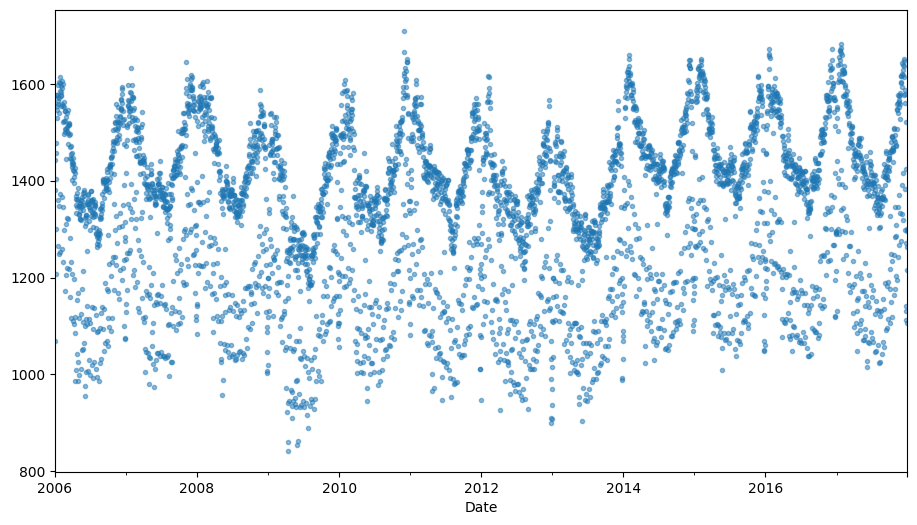

In [155]:
opsd_daily['Consumption'].plot(marker='.', alpha= 0.5, linestyle='None',figsize= (11,6))

<AxesSubplot: xlabel='Date'>

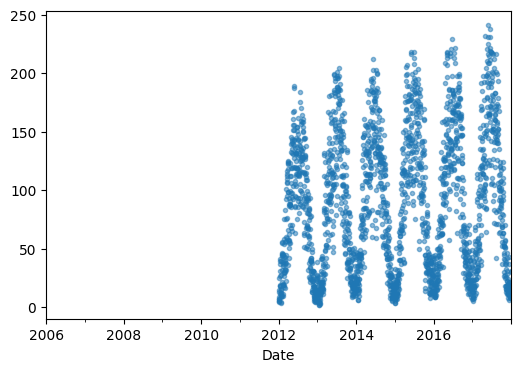

In [157]:
opsd_daily['Solar'].plot(marker='.', alpha= 0.5, linestyle='None',figsize= (6,4))

Text(0, 0.5, 'Daily Consumption (Gwh)')

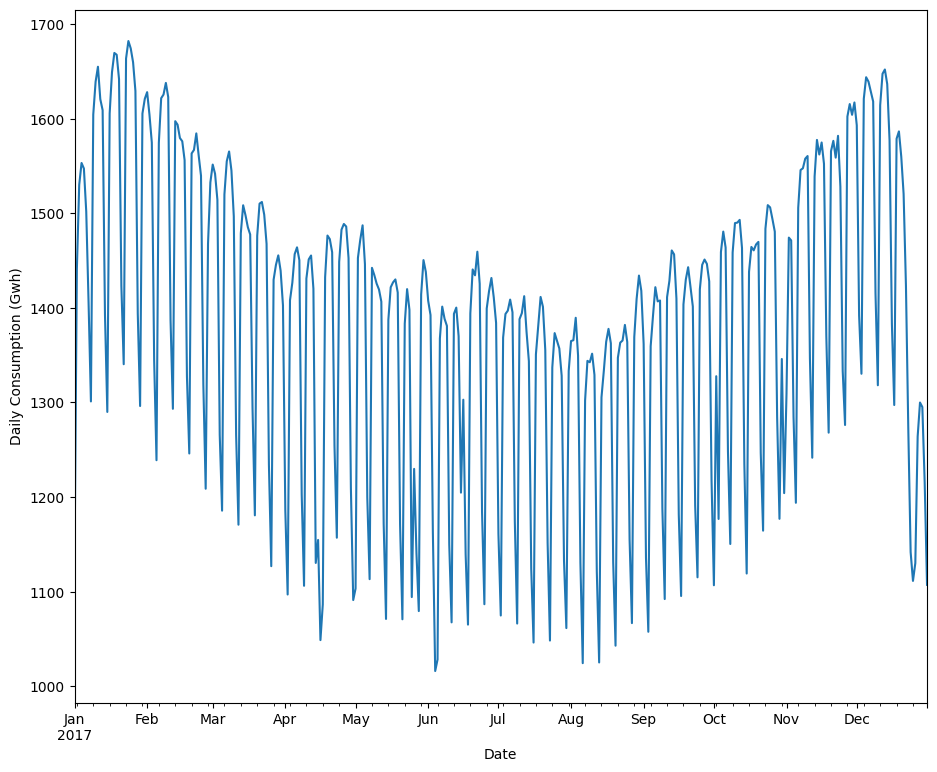

In [160]:
ax = opsd_daily.loc['2017','Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (Gwh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

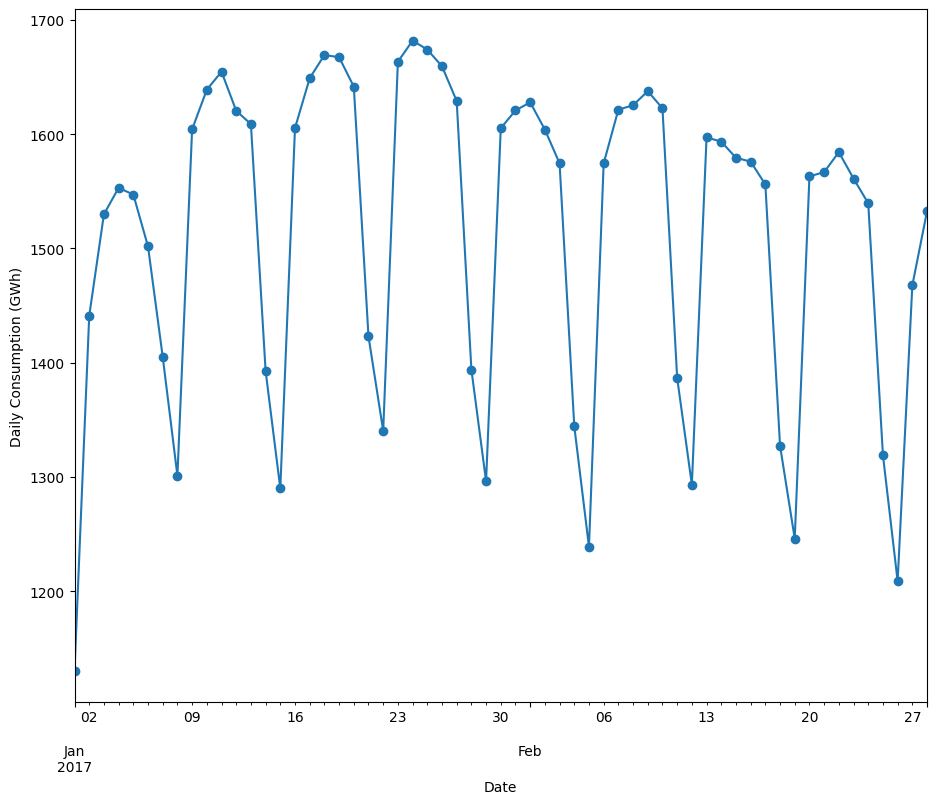

In [161]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9)) 
ax.set_ylabel('Daily Consumption (GWh)')

<AxesSubplot: >

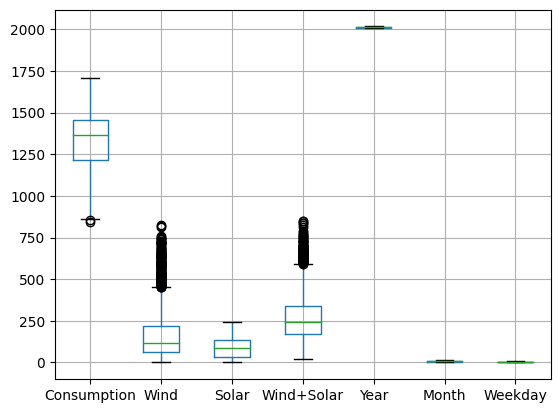

In [162]:
opsd_daily.boxplot()

<AxesSubplot: title={'center': 'Solar'}, xlabel='Month'>

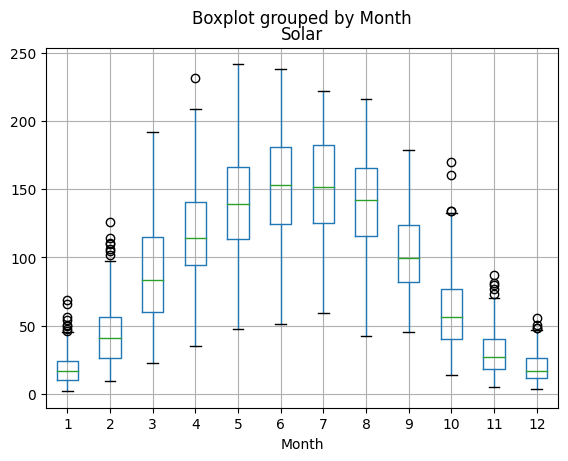

In [163]:
opsd_daily.boxplot(column=['Solar'], by='Month')